<div class="alert alert-success">

<h3>Análisis exploratorio de documentos de texto mediante LSA</h3><br>
    Utilizar LSA, LDiA para el ánalisis de temas  por clase (joke, no-joke), humor_mechanish y humor_rating(opcional) el dataset de tweets (humor.csv).
    <ul>
        <li>Generar la matriz de termino documento por clase y por humor_mechanish (tfidf y bag of words)</li>
        <li>Realice un análisis sobre las frecuencias(por clase y humor_mechanish) de términos sobre los vectore  TF-IDF y BoW. Utilice medidas estadísticas y nubes de palabras</li>
        <li>Realizar reducción de dimensión (utilice LatentDirichletAllocation y TruncateSVD)</li>
        <li>Elija un número de tópicos de al menos el mismo numero de humor_mechanish+1</li>
        <li>Determine el tópico de cada tweet y basado en los grupos obtenidos para cada tema, identifique las 10 palabras más frecuentes en cada tema.</li>
        <li>Determine si es posible identificar los temas en cada una de las clases y compare los resultados entre LSA y LDiA</li>
        <li>Realice un reporte. El documento deberá incluir las siguientes secciones:
        <ul>
            <li>Introducción</li>
            <li>Al menos una sección del análisis realizados y los resultados obtenidos.</li>
            <li>Conclusiones</li>
            <li>Referencias</li>
        </ul>
    </li>
    </ul>
    <b>Nota</b>: Subir un documento en formato pdf. Si utiliza estrategias adicionales por favor incluir las referencias. Si tienes alguna pregunta respecto al material o la actividad puedes ingresar al foro de dudas.
</div>

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ttrig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from collections import Counter
from utilidades import my_tokenizer, plotClusters
from matplotlib import pyplot as plt
import seaborn as sns
import wordcloud

In [4]:
data=pd.read_csv("humor.csv",delimiter=',',index_col=0) 


In [9]:
data.humor_mechanism.value_counts()

wordplay            701
reference           578
absurd              566
exaggeration        476
unmasking           441
misunderstanding    416
irony               371
analogy             319
embarrassment       301
parody              255
stereotype          230
insults             146
Name: humor_mechanism, dtype: int64

In [10]:
X=data[data.klass=='joke'].text

BAGOF WORDS

In [28]:
from sklearn.feature_extraction.text import  CountVectorizer

vectorizer = CountVectorizer(tokenizer=my_tokenizer).fit(X)
bag_of_words = vectorizer.transform(X) 
sum_words=bag_of_words.sum(axis=0) 
words_count = dict([(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]) 
words_count = Counter(words_count)

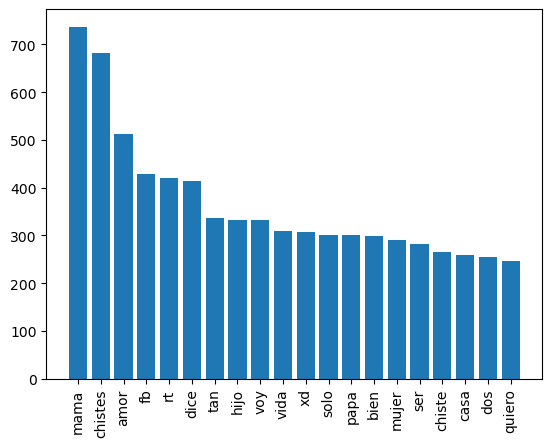

In [29]:
top=20
top_words=[x[0] for x in words_count.most_common(top)]
plt.bar(range(top),[x[1] for x in words_count.most_common(top)])
#Las palabras mas fecuentes en el corpus brown
plt.xticks(ticks=range(len(top_words)),labels=top_words,rotation='vertical'); 

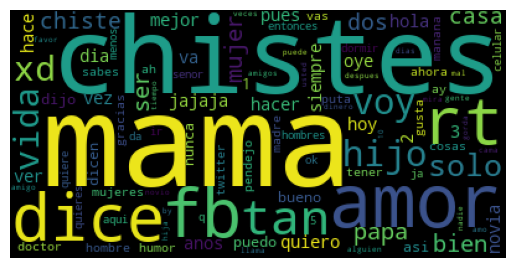

In [30]:
#obtener la frecuencia de cada palabra
sum_words = bag_of_words.sum(axis=0) # sumas la frecuencia de todas las palabras
#obtenemos cada termino y lo mapeamos
words_count = Counter(dict([(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]))

#Obtenemos una nube similar
wc=wordcloud.WordCloud()
wc.generate_from_frequencies(dict(words_count.most_common(100)))
plt.imshow(wc)
plt.axis("off")
plt.show()

tifdf

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
vec_tfidf.fit(X)

TfidfVectorizer(tokenizer=<function my_tokenizer at 0x000001922F59C9D0>)

In [48]:
vectorizer = TfidfVectorizer(tokenizer=my_tokenizer).fit(X)

In [49]:
bag_of_words = vectorizer.transform(X)

In [51]:
sum_words=bag_of_words.sum(axis=0)

In [52]:
words_count = dict([(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]) 

In [53]:
words_count=Counter(words_count)

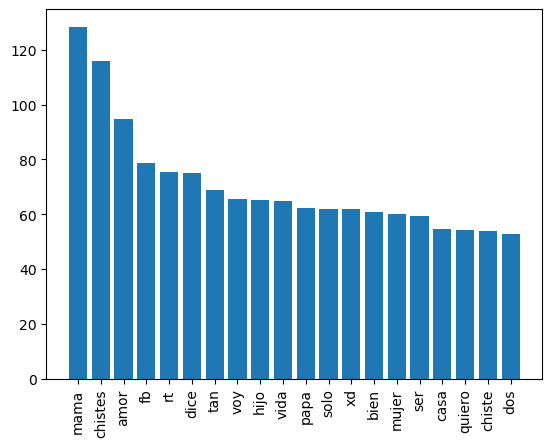

In [56]:
top=20
top_words=[x[0] for x in words_count.most_common(top)]
plt.bar(range(top),[x[1] for x in words_count.most_common(top)])
#Las palabras mas fecuentes en el corpus brown
plt.xticks(ticks=range(len(top_words)),labels=top_words,rotation='vertical'); 

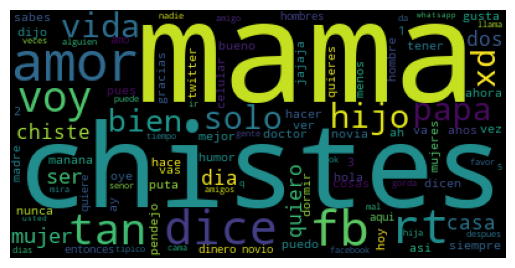

In [45]:
def nube_de_palabras(data, vectorizer=CountVectorizer, n=1):
    vectorizer = vectorizer(tokenizer=my_tokenizer,ngram_range=(n,n)).fit(data)
    bag_of_words = vectorizer.transform(data) 
    sum_words=bag_of_words.sum(axis=0) 
    words_count = dict([(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]) 
    words_count=Counter(words_count)
    wc=wordcloud.WordCloud()
    wc.generate_from_frequencies(dict(words_count.most_common(100)))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    return bag_of_words

bow=nube_de_palabras(X,TfidfVectorizer) #generamos la nube de palabras con los pesos tfidf

Reducción

bpw

In [64]:
bag_of_words

<9253x16830 sparse matrix of type '<class 'numpy.float64'>'
	with 80034 stored elements in Compressed Sparse Row format>

In [65]:
nt=8
svd = TruncatedSVD(n_components=nt, n_iter=100)
vectores_de_topicos_svd = svd.fit_transform(bag_of_words)
topicos=[f'topico{str(i+1).zfill(2)}' for i in range(nt)]
cols_num,terms_bow=zip(*sorted(zip(vectorizer.vocabulary_.values(), vectorizer.vocabulary_.keys()))) #

In [66]:
# El peso de cada palabra en cada uno de los topicos (ordenado alfabeticamente) 
componentes=pd.DataFrame(svd.components_.T,columns=topicos,index=terms_bow)
componentes.head()

,topico01,topico02,topico03,topico04,topico05,topico06,topico07,topico08
!,0.000056,-0.000063,0.000007,-0.000016,-0.000033,-0.000023,-0.000106,0.000008
(,0.000931,-0.001590,-0.001624,0.003320,0.001627,0.001772,0.001026,-0.001489
",",0.000056,-0.000063,0.000007,-0.000016,-0.000033,-0.000023,-0.000106,0.000008
-,0.000113,-0.000127,0.000014,-0.000032,-0.000066,-0.000045,-0.000213,0.000017
.,0.000056,-0.000063,0.000007,-0.000016,-0.000033,-0.000023,-0.000106,0.000008


In [67]:
# podemos ver los terminos de mayor peso en cada tópico
componentes.topico01.sort_values(ascending=False)[:10]  

mama       0.522179
chistes    0.248486
rt         0.198671
amor       0.183182
hijo       0.175087
papa       0.165319
chiste     0.158104
dice       0.139212
dicen      0.119856
xd         0.116404
Name: topico01, dtype: float64

TD-IDF

In [57]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=my_tokenizer).fit(X) # TF-IDF modelo
vtfid=vectorizer.transform(raw_documents=X)

In [58]:
nt=8
svd = TruncatedSVD(n_components=nt, n_iter=100)
vectores_de_topicos_svd = svd.fit_transform(vtfid)
topicos=[f'topico{str(i+1).zfill(2)}' for i in range(nt)]
cols_num,terms_bow=zip(*sorted(zip(vectorizer.vocabulary_.values(), vectorizer.vocabulary_.keys()))) #

In [59]:
# El peso de cada palabra en cada uno de los topicos (ordenado alfabeticamente) 
componentes=pd.DataFrame(svd.components_.T,columns=topicos,index=terms_bow)
componentes.head()

,topico01,topico02,topico03,topico04,topico05,topico06,topico07,topico08
!,0.000056,-0.000063,0.000007,-0.000016,-0.000033,-0.000023,-0.000106,0.000008
(,0.000931,-0.001590,-0.001624,0.003320,0.001627,0.001772,0.001026,-0.001489
",",0.000056,-0.000063,0.000007,-0.000016,-0.000033,-0.000023,-0.000106,0.000008
-,0.000113,-0.000127,0.000014,-0.000032,-0.000066,-0.000045,-0.000213,0.000017
.,0.000056,-0.000063,0.000007,-0.000016,-0.000033,-0.000023,-0.000106,0.000008


In [60]:
# podemos ver los terminos de mayor peso en cada tópico
componentes.topico01.sort_values(ascending=False)[:10]  

mama       0.522179
chistes    0.248486
rt         0.198671
amor       0.183182
hijo       0.175087
papa       0.165319
chiste     0.158104
dice       0.139212
dicen      0.119856
xd         0.116404
Name: topico01, dtype: float64

(array([6313.,  169.,  674.,  392.,  191.,  268.,  361.,  885.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

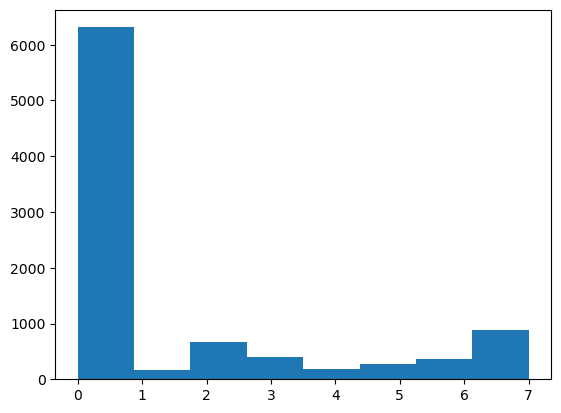

In [68]:
tweet_topico=np.argmax(vectores_de_topicos_svd,axis=1) #a que topico pertenece cada tweet
plt.hist(tweet_topico, bins=8)

c:\Users\ttrig\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


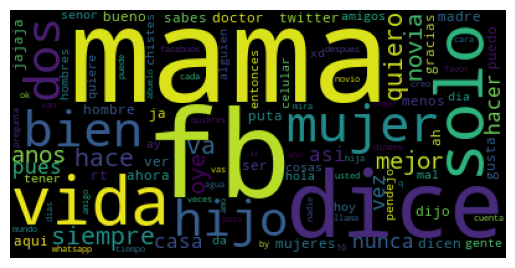

<6313x13363 sparse matrix of type '<class 'numpy.int64'>'
	with 54351 stored elements in Compressed Sparse Row format>

In [70]:
nube_de_palabras(X[np.argwhere(tweet_topico==0).flatten()])